# 📊 Projet : Analyse et Prévision des Ventes en Ligne (Online Sales)

## 🎯 Objectif du projet

L’objectif de ce projet est d’analyser les performances des ventes en ligne d’une entreprise afin de :

- Comprendre les tendances de vente dans le temps  
- Identifier les produits et catégories les plus performants  
- Analyser la performance commerciale par région  
- Prévoir les ventes futures pour aider à la prise de décision stratégique  

Ce projet vise à démontrer des compétences en **analyse de données**, **visualisation** et **machine learning appliqué au business**.


## 📦 Importation des bibliothèques

Dans cette section, nous importons les principales bibliothèques Python utilisées pour l’analyse des données et la visualisation :

- **NumPy** : utilisé pour les calculs numériques et les opérations mathématiques.
- **Pandas** : utilisé pour la manipulation, le nettoyage et l’analyse des données sous forme de DataFrame.
- **Matplotlib** : bibliothèque de base pour la création de graphiques et de visualisations.
- **Seaborn** : bibliothèque de visualisation basée sur Matplotlib, permettant de créer des graphiques statistiques plus lisibles et esthétiques.

Ces bibliothèques constituent l’environnement standard pour l’analyse de données en Python.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Chargement du jeu de données

Le jeu de données utilisé pour ce projet provient du **site OpenDataBay** et est disponible sous forme de fichier CSV : **`Online_Sales_Data.csv`**.  
Dans cette étape, le fichier est chargé dans un **DataFrame Pandas**, qui servira de base pour toutes les analyses exploratoires, visualisations et modèles prédictifs réalisés dans le projet.


## 📂 Chargement du jeu de données

Dans cette étape, le jeu de données **Online_Sales_Data.csv** est chargé dans un DataFrame Pandas.  
Ce DataFrame servira de base pour toutes les analyses exploratoires, les visualisations et la modélisation prédictive réalisées dans le projet.


In [2]:
import numpy as np
df = pd.read_csv('/Users/cheikhsall/Desktop/2025/Online_Sales_Data.csv')

## 🔍 Aperçu des premières lignes du dataset

La fonction `df.head()` permet d’afficher les premières lignes du jeu de données afin de :
- vérifier que les données ont été correctement chargées,
- comprendre la structure générale du dataset,
- identifier les principales colonnes et le type de valeurs qu’elles contiennent.

Cette étape est essentielle avant de commencer toute analyse ou transformation des données.


In [3]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## 🧾 Informations générales sur le dataset

La méthode `df.info()` fournit un résumé technique du jeu de données, notamment :
- le nombre total d’observations,
- le nom des colonnes,
- le type de données associé à chaque colonne,
- le nombre de valeurs non nulles.

Cette étape permet de vérifier la qualité des données et d’identifier d’éventuelles actions de nettoyage, comme la conversion de types ou la gestion des valeurs manquantes.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


## 🧩 Liste des colonnes du dataset

La commande `df.columns` permet d’afficher l’ensemble des noms de colonnes présents dans le jeu de données.  
Cette étape est essentielle pour :
- comprendre la structure du dataset,
- identifier les variables disponibles pour l’analyse,
- éviter les erreurs lors de la sélection ou de la manipulation des colonnes.

Elle facilite également la planification des analyses et des transformations à réaliser par la suite.


In [5]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

## 🧹 Vérification des valeurs manquantes

La méthode `df.isnull().sum()` permet de compter le nombre de valeurs manquantes pour chaque colonne du dataset.  
Cette étape est essentielle pour évaluer la qualité des données et décider des actions de nettoyage à entreprendre, telles que :
- la suppression des lignes incomplètes,
- l’imputation des valeurs manquantes,
- ou la conservation des données si l’impact est négligeable.

Une bonne gestion des valeurs manquantes est cruciale pour garantir la fiabilité des analyses et des modèles de machine learning.


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

## ✅ Interprétation des valeurs manquantes

Le résultat de la vérification des valeurs manquantes montre que **toutes les colonnes du dataset contiennent zéro valeur manquante**.

Cela signifie que :
- le jeu de données est **complet**,
- aucune opération d’imputation ou de suppression de lignes n’est nécessaire,
- les données peuvent être utilisées directement pour l’analyse exploratoire et la modélisation.

La qualité des données est donc satisfaisante, ce qui réduit les risques d’erreurs ou de biais lors des analyses et des modèles de machine learning.


# 📊 Analyse statistique des ventes en ligne

Cette section présente une analyse statistique complète du jeu de données **Online Sales Data**.  
L’objectif est de comprendre la structure des données, les comportements de vente et les relations entre les variables afin de soutenir la prise de décision business.

## 🔢 1. Analyse univariée

### 1.1 Analyse univariée quantitative

Cette sous-partie analyse les **variables numériques** du jeu de données :

- **Units Sold** : nombre d’unités vendues par transaction  
- **Unit Price** : prix unitaire du produit  
- **Total Revenue** : chiffre d’affaires généré par transaction  

L’objectif est d’étudier la distribution, la dispersion et les valeurs extrêmes de ces variables.

### 1.1.1  Analyse statistique de la tendance  du chiffre d’affaires

La méthode `describe()` appliquée à la colonne **Total Revenue** fournit des statistiques descriptives clés, telles que :
- le nombre de transactions,
- la moyenne du chiffre d’affaires par transaction,
- l’écart-type,
- les valeurs minimale et maximale,
- les quartiles (25 %, 50 %, 75 %).

Cette analyse permet de mieux comprendre la distribution du chiffre d’affaires, d’identifier d’éventuelles valeurs extrêmes et d’évaluer la variabilité des ventes.





In [7]:
df["Total Revenue"].describe()

count     240.000000
mean      335.699375
std       485.804469
min         6.500000
25%        62.965000
50%       179.970000
75%       399.225000
max      3899.990000
Name: Total Revenue, dtype: float64

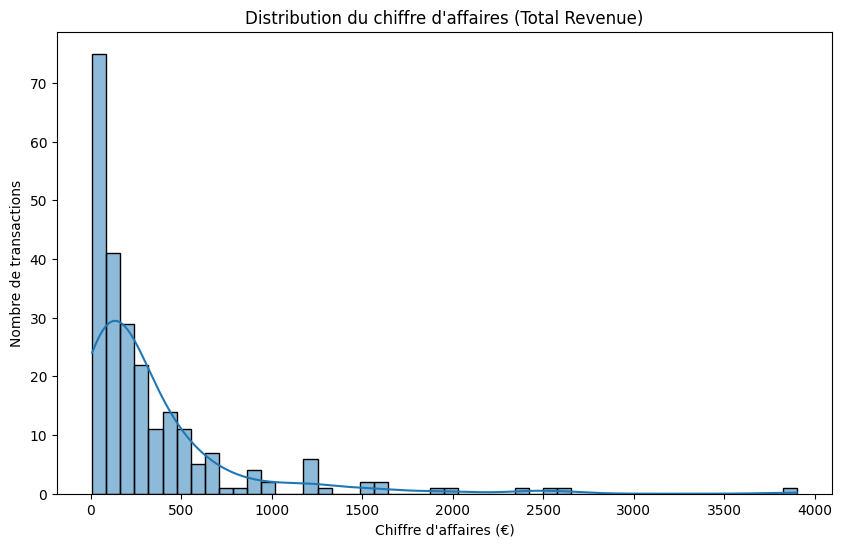

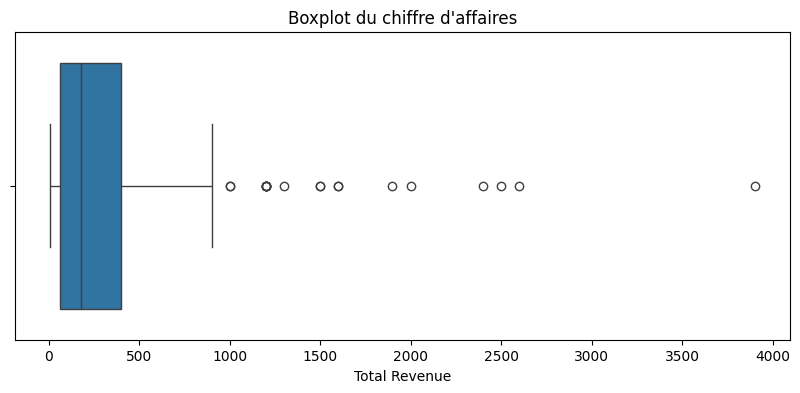

In [8]:
# Visualisation de la distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Total Revenue'], bins=50, kde=True)
plt.title("Distribution du chiffre d'affaires (Total Revenue)")
plt.xlabel("Chiffre d'affaires (€)")
plt.ylabel("Nombre de transactions")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df['Total Revenue'])
plt.title("Boxplot du chiffre d'affaires")
plt.show()


### 1.1.1.1 Interprétation

L’analyse statistique de la variable **Total Revenue** montre que l’étude porte sur **240 000 transactions**. Le chiffre d’affaires moyen par transaction est d’environ **336 €**, mais l’écart-type élevé (**486 €**) indique une forte variabilité des ventes. Le chiffre d’affaires varie de **6,50 € à 3 899,99 €**, ce qui traduit une grande diversité entre les transactions de faible valeur et celles à très forte valeur. La médiane (**179,97 €**) est inférieure à la moyenne, ce qui suggère une distribution asymétrique avec la présence de valeurs élevées qui tirent la moyenne vers le haut. Enfin, 75 % des transactions génèrent un chiffre d’affaires inférieur à **399,23 €**, ce qui confirme que la majorité des ventes sont faibles à modérées, avec quelques transactions exceptionnelles.


In [9]:
# Autre méthode pour filtrer seulement la moyenne, la médiane et le mode.
somme = df["Total Revenue"] 
moyenne = somme.mean()
median = somme.median()
mode = somme.mode()[0]
print(f"Moyenne : {moyenne:.2f}")
print(f"Mediane: {median:.2f}")
print(f"Mode : {mode:.2f}")

Moyenne : 335.70
Mediane: 179.97
Mode : 299.99


### 1.1.2 Analyse de la dispersion et de la variabilité du chiffre d’affaires

Cette sous-partie vise à étudier la **dispersion** du chiffre d’affaires par transaction à l’aide d’indicateurs statistiques tels que la **variance, l’écart-type, l’étendue** et le **coefficient de variation**. Ces mesures permettent de comprendre l’hétérogénéité des ventes et l’impact des transactions exceptionnelles sur la distribution globale.


In [10]:
variance = somme.var(ddof=1)
std_df = somme.std(ddof=1)
vmin = somme.min()
vmax = somme.max()
étendu = vmax - vmin
cv = (std_df/moyenne)*100

print(f"Variance : {variance:.2f}")
print(f"Ecart_type : {std_df :.2f}")
print(f"Minimum : {vmin:.2f}")
print(f"Maximum : {vmax:.2f}")
print(f"Étendu : {étendu:.2f}")
print(f"Coefficioent de collération : {cv:.2f}")

Variance : 236005.98
Ecart_type : 485.80
Minimum : 6.50
Maximum : 3899.99
Étendu : 3893.49
Coefficioent de collération : 144.71


#### Interprétation

Les mesures de dispersion du chiffre d’affaires montrent une **forte variabilité des ventes**. La variance élevée (**236 005,98 €²**) et l’écart-type (**485,80 €**) indiquent que les transactions s’écartent largement de la moyenne. L’étendue (**3 893,49 €**) confirme que certaines transactions sont très faibles tandis que d’autres sont exceptionnellement élevées. Le coefficient de variation (**144,71 %**) montre que la dispersion est très importante par rapport à la moyenne, traduisant une **instabilité du chiffre d’affaires par transaction**. Ces résultats indiquent que, bien que la majorité des ventes soient modestes, quelques transactions exceptionnelles influencent fortement la distribution globale.


In [11]:
q1 = somme.quantile(0.25)
q2 = somme.quantile(0.5)
q3 = somme.quantile(0.75)

print(f"Q1 : {q1:.2f}")
print(f"Q2 : {q2:.2f}")
print(f"Q3 : {q3:.2f}")

Q1 : 62.97
Q2 : 179.97
Q3 : 399.23


In [12]:
# calule des centiles
p1 = somme.quantile(0.01)
p50 = somme.quantile(0.5)
p99 = somme.quantile(0.99)

print(f"premier percentile : {p1:.2f}")
print(f"p50 : {p50:.2f}")
print(f"p99 : {p99:.2f}")

premier percentile : 10.00
p50 : 179.97
p99 : 2460.60


In [13]:
iqr = q3 - q1
born_inf = q1 - 1.5*iqr
born_sup = q3 + 1.5*iqr

print(f"IQR : {iqr:.2f}")
print(f"borne inféreur de outlier : {born_inf:.2f}")
print(f"borne supérieur de outlie : {born_sup:.2f}")
outliers = somme[(somme < born_inf) | (somme < born_sup) ]
print(f"\nNombre d'outliers détecté : {outliers.shape[0]}")

IQR : 336.26
borne inféreur de outlier : -441.42
borne supérieur de outlie : 903.62

Nombre d'outliers détecté : 221


In [39]:
skewness = somme.skew()
kurtosis = somme.kurtosis()
print(f"Skewness (symétriee) : {skewness:.2f}")
print(f"Kurtosis  (applatissement) : {kurtosis :.2f}")

Skewness (symétriee) : 3.52
Kurtosis  (applatissement) : 16.68


## 1.2 Analyse univariée qualitative

Cette sous-partie analyse les **variables qualitatives** du jeu de données afin de comprendre la répartition des transactions selon différents segments.  
Les variables étudiées sont :

- **Product Category** : catégorie du produit  
- **Region** : région où la vente a été effectuée  
- **Payment Method** : méthode de paiement utilisée  

L’objectif est d’identifier les catégories dominantes, les régions les plus actives et les méthodes de paiement les plus utilisées.


### 1.2.1 Analyse statistique de la répartition des méthodes de paiement

#### 🎯 Objectif

L’objectif de cette analyse est d’étudier la répartition des transactions selon les **méthodes de paiement** utilisées par les clients.  
Elle permet d’identifier les moyens de paiement les plus populaires et de mieux comprendre les préférences des clients, ce qui peut orienter les décisions commerciales et l’optimisation des parcours de paiement.

#### 🔍 Méthode utilisée

L’analyse repose sur une **analyse univariée qualitative** et comprend les étapes suivantes :
- calcul des **fréquences absolues** (nombre de transactions par méthode de paiement),
- calcul des **fréquences relatives** (pourcentage de chaque méthode),
- visualisation des résultats à l’aide d’un **diagramme en barres** afin de comparer facilement les méthodes de paiement.



In [44]:
# Fréquences absolues des méthodes de paiement
payment_counts = df['Payment Method'].value_counts()

# Fréquences relatives (en pourcentage)
payment_percentages = df['Payment Method'].value_counts(normalize=True) * 100

# Affichage des résultats
payment_df = pd.DataFrame({
    'Nombre de transactions': payment_counts,
    'Pourcentage (%)': payment_percentages.round(2)
})

payment_df


,Nombre de transactions,Pourcentage (%)
Payment Method,,
Credit Card,120,50.00
PayPal,80,33.33
Debit Card,40,16.67


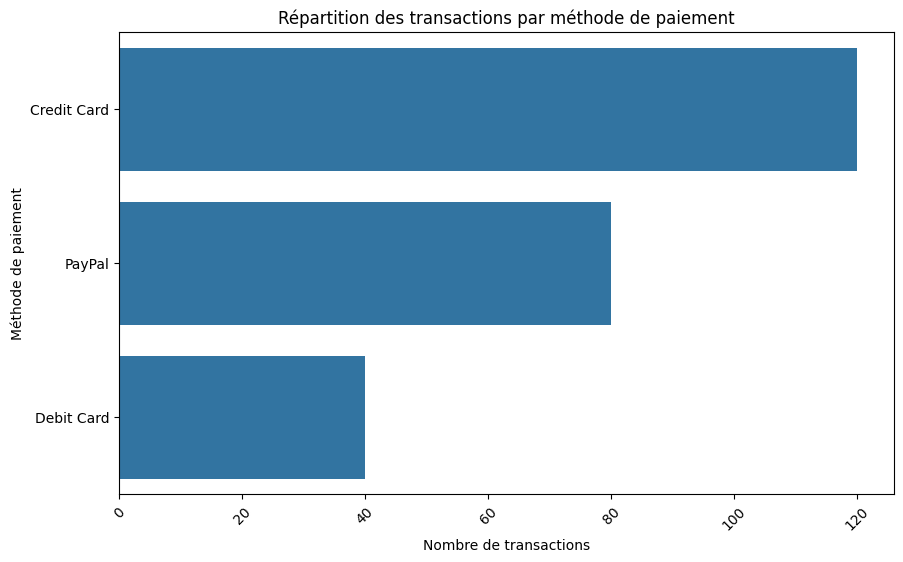

In [48]:
# Visualisation de la répartition des méthodes de paiement
plt.figure(figsize=(10,6))
sns.barplot(
    x=payment_counts.values,
    y=payment_counts.index
)
plt.title("Répartition des transactions par méthode de paiement")
plt.xlabel("Nombre de transactions")
plt.ylabel("Méthode de paiement")
plt.xticks(rotation=45)
plt.show()




#### Interprétation

L’analyse de la répartition des méthodes de paiement montre que la **carte de crédit** est le moyen de paiement le plus utilisé, représentant **50 % des transactions**, ce qui indique une forte préférence des clients pour ce mode de paiement. **PayPal** arrive en deuxième position avec **33,33 %** des transactions, suggérant une adoption importante des solutions de paiement en ligne. Enfin, la **carte de débit** est moins utilisée, avec **16,67 %** des transactions. Cette répartition met en évidence une domination des paiements par carte de crédit, tout en montrant une diversité des moyens de paiement, ce qui souligne l’importance de proposer plusieurs options pour répondre aux préférences des clients.


### 1.2.2 Analyse statistique de la répartition des catégories de produits

#### 🎯 Objectif

L’objectif de cette analyse est d’étudier la répartition des transactions selon les **catégories de produits**.  
Elle permet d’identifier les catégories les plus populaires auprès des clients et de mieux comprendre la structure des ventes, afin d’orienter les décisions commerciales et marketing.

#### 🔍 Méthode utilisée

Cette analyse repose sur une **analyse univariée qualitative** et comprend :
- le calcul des **fréquences absolues** (nombre de transactions par catégorie),
- le calcul des **fréquences relatives** (pourcentage de chaque catégorie),
- une **visualisation par diagramme en barres** pour comparer les catégories de produits.


In [49]:
# Fréquences absolues des catégories de produits
category_counts = df['Product Category'].value_counts()

# Fréquences relatives (en pourcentage)
category_percentages = df['Product Category'].value_counts(normalize=True) * 100

# Tableau récapitulatif
category_df = pd.DataFrame({
    'Nombre de transactions': category_counts,
    'Pourcentage (%)': category_percentages.round(2)
})

category_df


,Nombre de transactions,Pourcentage (%)
Product Category,,
Electronics,40,16.67
Home Appliances,40,16.67
Clothing,40,16.67
Books,40,16.67
Beauty Products,40,16.67
Sports,40,16.67


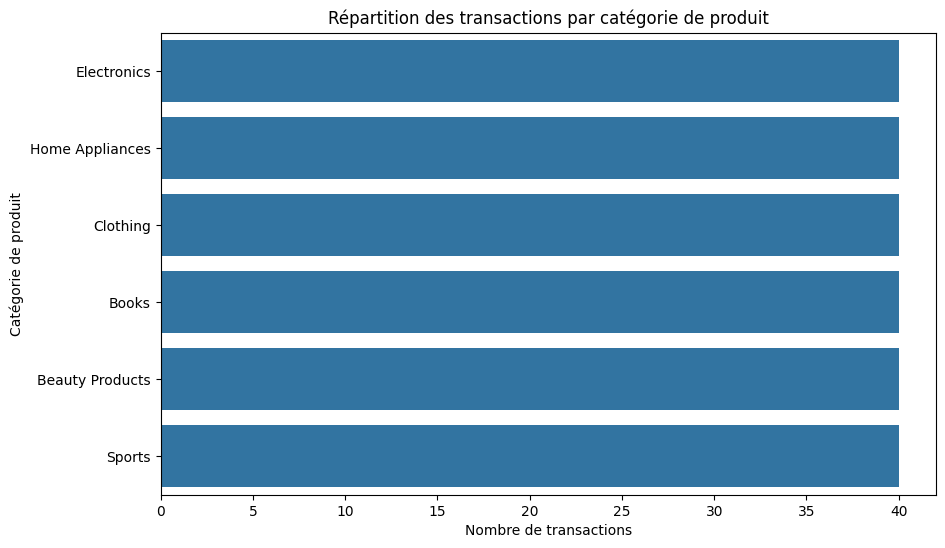

In [50]:
# Visualisation de la répartition des catégories de produits
plt.figure(figsize=(10,6))
sns.barplot(
    x=category_counts.values,
    y=category_counts.index
)
plt.title("Répartition des transactions par catégorie de produit")
plt.xlabel("Nombre de transactions")
plt.ylabel("Catégorie de produit")
plt.show()


### 📌 Interprétation

L’analyse de la répartition des catégories de produits montre une **distribution parfaitement équilibrée** des transactions entre les différentes catégories, chacune représentant **16,67 % du total**. Cette homogénéité indique qu’aucune catégorie ne domine les ventes en volume, ce qui suggère que le jeu de données a été construit de manière **uniforme ou synthétique**. Dans ce contexte, la variable *catégorie de produit* n’introduit **aucune variabilité significative** en termes de fréquence et ne permet pas d’identifier des préférences marquées des clients. Une **analyse complémentaire**, croisant les catégories avec le **chiffre d’affaires** ou les **régions**, serait nécessaire afin de dégager des tendances plus pertinentes et exploitables.


### 1.2.3 Analyse statistique de la répartition des régions

#### 🎯 Objectif

L’objectif de cette analyse est d’étudier la répartition des transactions selon les **régions**.  
Cela permet d’identifier les zones géographiques les plus actives, de comprendre où l’entreprise génère le plus de ventes, et de détecter des opportunités pour **optimiser la stratégie commerciale régionale**.

#### 🔍 Méthode utilisée

L’analyse repose sur une **analyse univariée qualitative** et comprend :
- le calcul des **fréquences absolues** (nombre de transactions par région)  
- le calcul des **fréquences relatives** (pourcentage de chaque région)  
- la visualisation des résultats via un **diagramme en barres**, pour comparer facilement les régions.



In [51]:
# Fréquences absolues par région
region_counts = df['Region'].value_counts()

# Fréquences relatives en pourcentage
region_percentages = df['Region'].value_counts(normalize=True) * 100

# Tableau récapitulatif
region_df = pd.DataFrame({
    'Nombre de transactions': region_counts,
    'Pourcentage (%)': region_percentages.round(2)
})

region_df


,Nombre de transactions,Pourcentage (%)
Region,,
North America,80,33.33
Europe,80,33.33
Asia,80,33.33


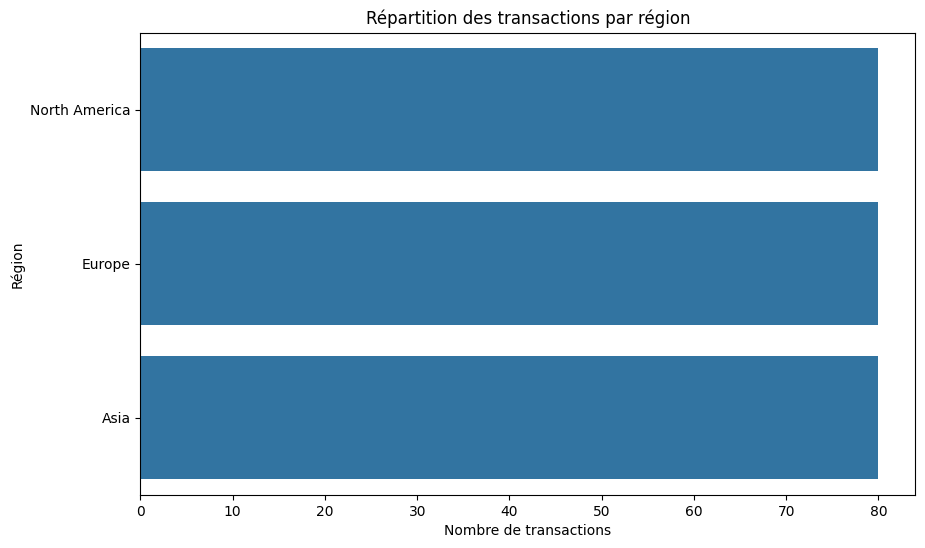

In [52]:
# Visualisation de la répartition des transactions par région
plt.figure(figsize=(10,6))
sns.barplot(
    x=region_counts.values,
    y=region_counts.index
)
plt.title("Répartition des transactions par région")
plt.xlabel("Nombre de transactions")
plt.ylabel("Région")
plt.show()


### 📌 Interprétation

L’analyse de la répartition des transactions par région montre une **distribution parfaitement équilibrée**, chaque région représentant **33,33 %** du volume total des ventes. Cette uniformité indique qu’aucune région ne domine en termes de nombre de transactions, ce qui suggère que le jeu de données a été **construit de manière équilibrée ou synthétique**.
D’un point de vue décisionnel, cette variable ne permet pas, à elle seule, d’identifier des **marchés prioritaires**. Pour obtenir des insights business exploitables, il est nécessaire de croiser les régions avec des indicateurs financiers tels que le **chiffre d’affaires**, la **marge** ou le **type de produit vendu**, afin de repérer les régions à fort potentiel ou les zones nécessitant un développement commercial ciblé.


## 1.3 Analyse quantitative bivariée

### 🎯 Objectif

L’objectif de cette analyse est d’étudier les **relations entre deux variables**, afin de détecter des corrélations, tendances ou dépendances.  
Dans le contexte des ventes en ligne, cela permet de répondre à des questions telles que :
- Existe-t-il une relation entre le **nombre d’unités vendues** et le **chiffre d’affaires** ?
- Comment le **chiffre d’affaires** varie-t-il selon la **catégorie de produit** ou la **région** ?
- Quels facteurs influencent le plus les ventes ? 



Cette analyse est essentielle pour identifier des **leviers de croissance** et orienter les décisions commerciales.


## 1.3.1 Analyse statistique bivariée entre deux variables quantitatives

### 🎯 Objectif

L’objectif de cette analyse est d’étudier la relation entre **deux variables quantitatives** afin de détecter :
- des **corrélations** (positives ou négatives),
- des **tendances linéaires ou non linéaires**,
- d’éventuelles **valeurs aberrantes** (outliers).  

Exemples concrets pour les ventes en ligne :  
- Existe-t-il une relation entre **Units Sold** et **Total Revenue** ?  
- Le **prix unitaire** influence-t-il le chiffre d’affaires généré ?  

Cette analyse est essentielle pour comprendre quels facteurs influencent le **volume et la valeur des ventes** et pour orienter les décisions stratégiques.


### 🔍 Méthode utilisée

Pour deux variables quantitatives, on utilise principalement :

1. **Corrélation linéaire**  
   - `df.corr()` ou `pearsonr` pour mesurer la force et le sens de la relation entre les variables.

2. **Visualisation graphique**  
   - **Scatter plot** pour observer la tendance globale.  
   - **Regression linéaire** pour visualiser la relation linéaire.

3. **Résumé statistique**  
   - Calcul de la **moyenne**, **médiane** et **écart-type** par tranche  pour identifier les tendances et la dispersion.


Coefficient de corrélation entre Units Sold et Total Revenue : -0.17
Coefficient de corrélation entre Unit Price et Total Revenue : 0.93


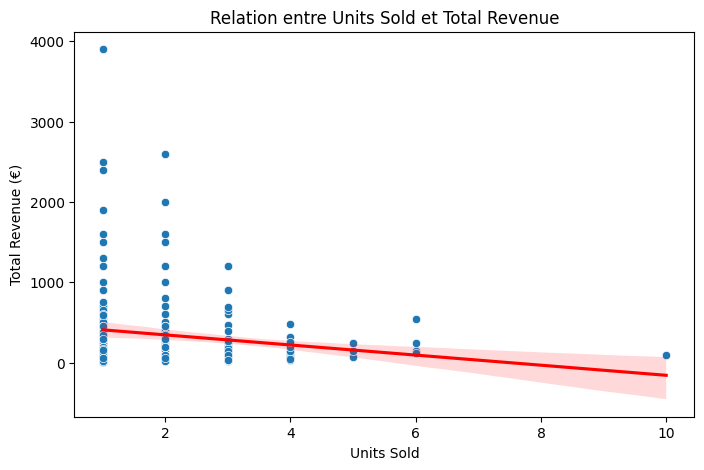

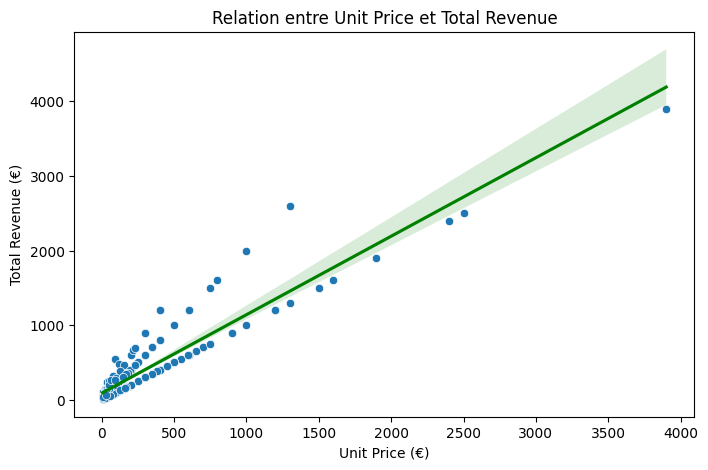

/var/folders/8_/hlwdfrzj5y52dcwyqw_4zm7m0000gn/T/ipykernel_2924/2598965336.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_units_bin = df.groupby('Units_Sold_Bin')['Total Revenue'].agg(['mean','median','std']).round(2)


,mean,median,std
Units_Sold_Bin,,,
"(0.991, 2.8]",396.40,199.99,558.75
"(2.8, 4.6]",215.41,134.97,260.42
"(4.6, 6.4]",201.31,149.95,126.21
"(6.4, 8.2]",NaN,NaN,NaN
"(8.2, 10.0]",99.90,99.90,NaN


In [53]:
# 1️⃣ Corrélation linéaire entre deux variables quantitatives
corr_units_revenue = df['Units Sold'].corr(df['Total Revenue'])
print(f"Coefficient de corrélation entre Units Sold et Total Revenue : {corr_units_revenue:.2f}")

corr_price_revenue = df['Unit Price'].corr(df['Total Revenue'])
print(f"Coefficient de corrélation entre Unit Price et Total Revenue : {corr_price_revenue:.2f}")

# 2️⃣ Scatter plot avec ligne de régression
plt.figure(figsize=(8,5))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df)
sns.regplot(x='Units Sold', y='Total Revenue', data=df, scatter=False, color='red')
plt.title("Relation entre Units Sold et Total Revenue")
plt.xlabel("Units Sold")
plt.ylabel("Total Revenue (€)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Unit Price', y='Total Revenue', data=df)
sns.regplot(x='Unit Price', y='Total Revenue', data=df, scatter=False, color='green')
plt.title("Relation entre Unit Price et Total Revenue")
plt.xlabel("Unit Price (€)")
plt.ylabel("Total Revenue (€)")
plt.show()

# 3️⃣ Résumé statistique par tranche ou catégorie (optionnel)
# Exemple : moyenne, médiane et écart-type du Total Revenue par tranche de Units Sold
# On peut créer des tranches d'unités vendues
df['Units_Sold_Bin'] = pd.cut(df['Units Sold'], bins=5)
stats_by_units_bin = df.groupby('Units_Sold_Bin')['Total Revenue'].agg(['mean','median','std']).round(2)
stats_by_units_bin


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variable explicative et variable cible
X = df[['Unit Price']]
y = df['Total Revenue']

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficient (pente) : {model.coef_[0]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")
print(f"MSE : {mse:.2f}")
print(f"R² : {r2:.2f}")


Coefficient (pente) : 1.07
Intercept : 88.17
MSE : 22246.99
R² : 0.88



### 📌 Interprétation
- Chaque augmentation de 1 unité du prix unitaire entraîne une hausse moyenne de 1.07 du revenu total.
- Si le prix unitaire était 0, le revenu total serait estimé à 88.17.
- Le modèle explique 88% de la variance du revenu total.


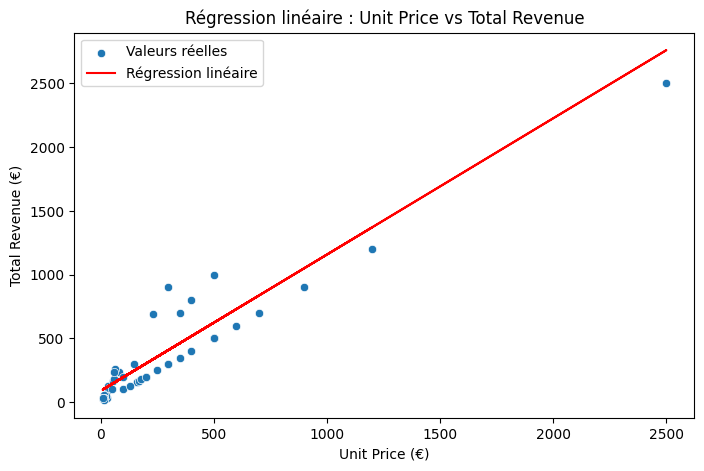

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Unit Price'], y=y_test, label="Valeurs réelles")
plt.plot(X_test['Unit Price'], y_pred, color='red', label="Régression linéaire")
plt.title("Régression linéaire : Unit Price vs Total Revenue")
plt.xlabel("Unit Price (€)")
plt.ylabel("Total Revenue (€)")
plt.legend()
plt.show()


Le graphique montre la relation entre le **prix unitaire** et le **revenu total** :  

- Les **points bleus** représentent les valeurs réelles.  
- La **ligne rouge** correspond à la droite de régression linéaire. 

  ### 📌 Interprétation
- Le revenu total augmente avec le prix unitaire, confirmant la tendance positive observée dans le modèle (R² = 0,88).  
- La plupart des points suivent bien la droite, ce qui indique que le modèle prédit correctement le revenu total pour la majorité des ventes.  
- Quelques points s’éloignent de la droite, suggérant des ventes exceptionnelles ou des valeurs atypiques.

## 1.3.2 Analyse statistique bivariée entre une variable quantitative et une variable qualitative

### 🎯 Objectif

L’objectif de cette analyse est d’étudier comment une **variable quantitative** varie en fonction des **modalités d’une variable qualitative**.  
Dans le cadre des ventes en ligne, cette analyse permet notamment de :
- comparer le **chiffre d’affaires** selon les **catégories de produits**,  
- analyser les différences de performance entre **régions**,  
- identifier les segments générant les **ventes les plus élevées**.

Cette approche est essentielle pour comprendre l’impact des facteurs qualitatifs sur la performance financière et orienter les **décisions commerciales et marketing**.


### 1.3.2.1 Chiffre d’affaires selon la catégorie de produit

#### 🎯 Objectif
Analyser comment le **chiffre d’affaires par transaction** varie selon les **catégories de produits**, afin d’identifier les catégories les plus rentables et celles nécessitant une optimisation commerciale.
#### 🔍 Méthode utilisée

- Statistiques descriptives par catégorie (moyenne, médiane, écart-type)
- Visualisation comparative à l’aide d’un **boxplot**


In [58]:
# Statistiques descriptives par catégorie de produit
revenue_by_category = (
    df.groupby('Product Category')['Total Revenue']
      .agg(['mean', 'median', 'std'])
      .round(2)
      .sort_values(by='mean', ascending=False)
)
revenue_by_category

,mean,median,std
Product Category,,,
Electronics,874.56,674.98,784.89
Home Appliances,466.15,389.00,462.80
Sports,358.16,259.98,320.60
Clothing,203.22,179.97,117.25
Beauty Products,65.55,51.00,67.03
Books,46.55,38.47,25.19


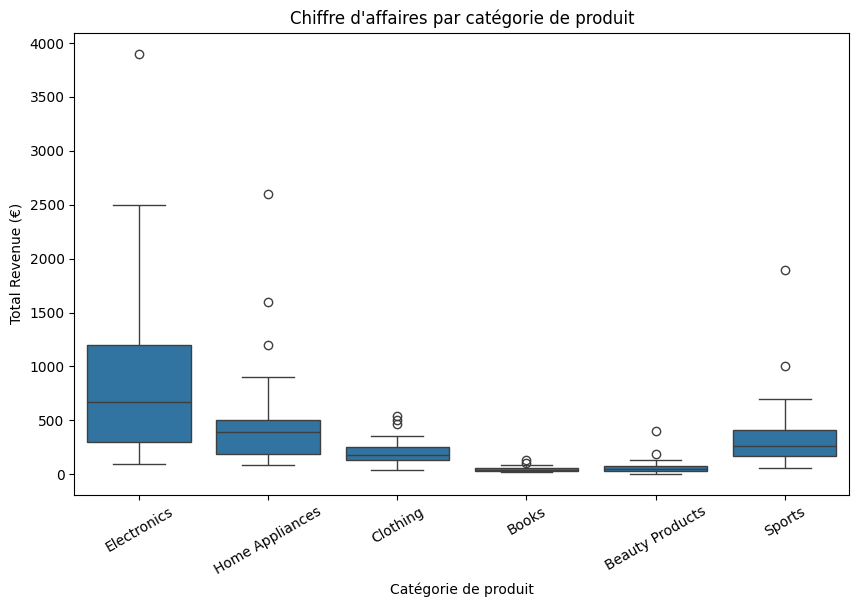

In [57]:
# Boxplot : chiffre d'affaires par catégorie de produit
plt.figure(figsize=(10,6))
sns.boxplot(x='Product Category', y='Total Revenue', data=df)
plt.title("Chiffre d'affaires par catégorie de produit")
plt.xlabel("Catégorie de produit")
plt.ylabel("Total Revenue (€)")
plt.xticks(rotation=30)
plt.show()


### 📌 Interprétation

L’analyse du chiffre d’affaires par catégorie de produit montre que **l’électronique** domine largement la performance économique, avec le **revenu moyen et médian les plus élevés**, mais aussi une **forte variabilité**, indiquant des ventes importantes mais hétérogènes. Les **appareils électroménagers** et le **sport** constituent des segments intermédiaires, générant des revenus significatifs avec une dispersion modérée. À l’inverse, les catégories **vêtements**, **produits de beauté** et surtout **livres** affichent des revenus plus faibles et une variabilité réduite, traduisant des ventes plus régulières mais à **faible valeur unitaire**.  

D’un point de vue **business**, ces résultats suggèrent de concentrer les stratégies de croissance et d’optimisation sur les catégories à **forte valeur** (électronique, électroménager), tout en utilisant les catégories à **faible revenu** comme leviers de **volume** ou de **fidélisation**.


## 1.3.2.2 Chiffre d’affaires selon la région
### 🎯 Objectif
Comparer le chiffre d’affaires par transaction entre les différentes régions, afin d’évaluer les performances géographiques et d’identifier les marchés à fort potentiel.
### 🔍 Méthode utilisée
- Statistiques descriptives par région
- Visualisation à l’aide d’un boxplot

In [60]:
# Statistiques descriptives par région
revenue_by_region = (
    df.groupby('Region')['Total Revenue']
      .agg(['mean', 'median', 'std'])
      .round(2)
      .sort_values(by='mean', ascending=False)
)
revenue_by_region


,mean,median,std
Region,,,
North America,460.55,118.98,691.38
Asia,280.69,214.98,252.20
Europe,265.85,115.00,385.47


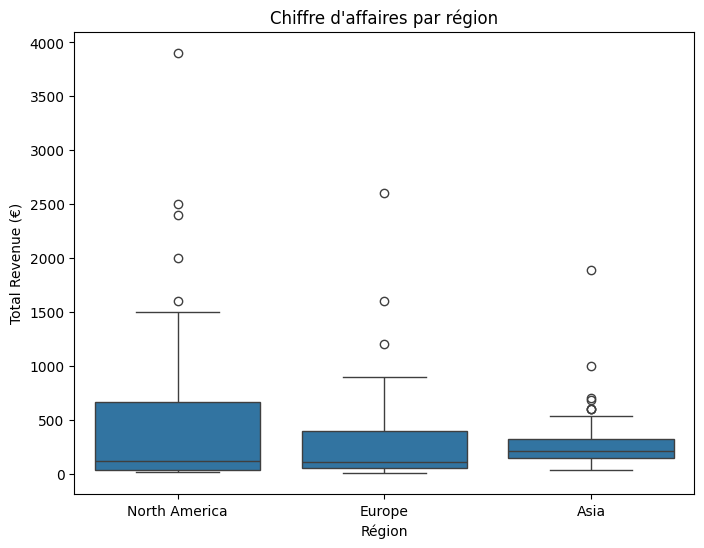

In [61]:
# Boxplot : chiffre d'affaires par région
plt.figure(figsize=(8,6))
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title("Chiffre d'affaires par région")
plt.xlabel("Région")
plt.ylabel("Total Revenue (€)")
plt.show()


### 📌 Interprétation

L’analyse statistique du chiffre d’affaires par région montre des **différences notables en termes de niveau moyen et de variabilité**. L’Amérique du Nord présente le **revenu moyen le plus élevé** (**460,55 €**), accompagné d’un **écart-type très important** (**691,38 €**), ce qui indique la présence de transactions à très forte valeur qui tirent la moyenne vers le haut, mais aussi une forte hétérogénéité des ventes.  

L’Asie affiche un **revenu moyen intermédiaire** (**280,69 €**) et une **médiane élevée** (**214,98 €**), suggérant des ventes plus **régulières et stables**, avec une dispersion plus faible que les autres régions.  

L’Europe, bien que proche de l’Asie en moyenne (**265,85 €**), présente une **médiane basse** (**115 €**) et une **variabilité plus marquée** (**385,47 €**), traduisant une distribution asymétrique avec quelques transactions élevées mais une majorité de ventes de faible valeur.  

D’un point de vue **business**, ces résultats suggèrent que l’Amérique du Nord est un **marché à fort potentiel mais risqué**, l’Asie un **marché plus stable et prévisible**, et l’Europe un **marché intermédiaire** nécessitant des stratégies ciblées pour augmenter la valeur moyenne des transactions.


## 1.3.2.3 Chiffre d’affaires selon la méthode de paiement
### 🎯 Objectif
Analyser l’impact des méthodes de paiement sur le chiffre d’affaires par transaction, afin de comprendre les comportements d’achat et d’optimiser l’expérience client.
### 🔍 Méthode utilisée
- Statistiques descriptives par méthode de paiement
- Visualisation par boxplot

In [62]:
# Statistiques descriptives par méthode de paiement
revenue_by_payment = (
    df.groupby('Payment Method')['Total Revenue']
      .agg(['mean', 'median', 'std'])
      .round(2)
      .sort_values(by='mean', ascending=False)
)
revenue_by_payment


,mean,median,std
Payment Method,,,
Credit Card,426.42,214.98,594.45
PayPal,265.85,115.00,385.47
Debit Card,203.22,179.97,117.25


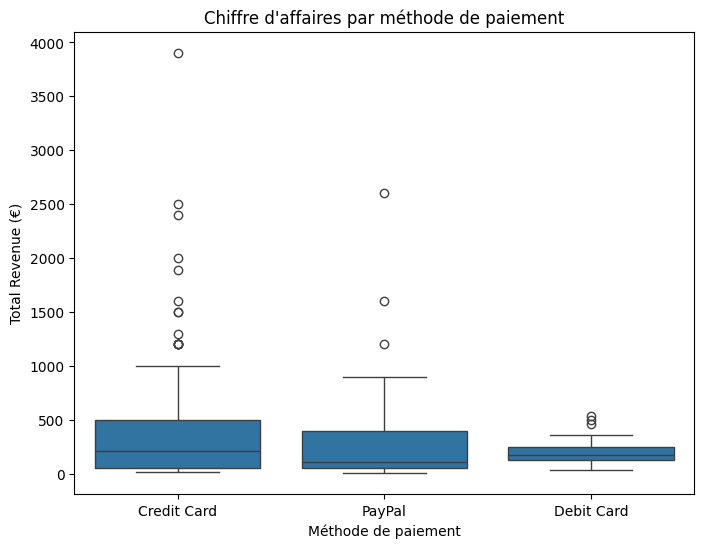

In [63]:
# Boxplot : chiffre d'affaires par méthode de paiement
plt.figure(figsize=(8,6))
sns.boxplot(x='Payment Method', y='Total Revenue', data=df)
plt.title("Chiffre d'affaires par méthode de paiement")
plt.xlabel("Méthode de paiement")
plt.ylabel("Total Revenue (€)")
plt.show()


### 📌 Interprétation

L’analyse du chiffre d’affaires par **méthode de paiement** met en évidence des **différences significatives de valeur et de variabilité des transactions**. Les paiements par **carte de crédit** génèrent le **chiffre d’affaires moyen le plus élevé** (**426,42 €**), avec une **forte dispersion** (**écart-type de 594,45 €**), ce qui suggère que ce mode de paiement est privilégié pour des achats à forte valeur, mais avec des montants très hétérogènes.  

Le **PayPal** occupe une position intermédiaire, avec un revenu moyen plus modéré (**265,85 €**) et une **médiane faible** (**115 €**), indiquant que la majorité des transactions sont de faible montant, malgré la présence de quelques ventes plus importantes.  

La **carte de débit** affiche le **revenu moyen le plus faible** (**203,22 €**) et la **variabilité la plus réduite** (**117,25 €**), traduisant des achats plus **réguliers et prudents**, généralement associés à des paniers de faible à moyenne valeur.  

D’un point de vue **business**, ces résultats suggèrent que la **carte de crédit est un levier clé pour maximiser le chiffre d’affaires**, tandis que PayPal et la carte de débit peuvent être utilisés pour favoriser le volume de transactions et la fluidité du parcours client.


## 1.3.3 Analyse statistique multivariée

### 🎯 Objectif
L’objectif de l’analyse multivariée est d’étudier **l’influence simultanée de plusieurs variables** sur le chiffre d’affaires (**Total Revenue**), afin d’identifier les combinaisons de facteurs les plus performantes d’un point de vue business.  
Contrairement aux analyses univariées et bivariées, cette approche permet de mieux comprendre les **interactions entre variables quantitatives et qualitatives**.

### 🔍 Méthodes utilisées
Pour cette analyse, les méthodes suivantes sont mobilisées :

- **Analyse de corrélation multivariée**
  - Matrice de corrélation entre variables quantitatives  
  - Identification des relations linéaires entre `Units Sold`, `Unit Price` et `Total Revenue`

- **Analyse par segmentation**
  - Agrégation du chiffre d’affaires par **catégorie de produit**, **région** et **méthode de paiement**
  - Comparaison des moyennes et médianes selon plusieurs dimensions

- **Visualisation multivariée**
  - Heatmap de corrélation
 
 

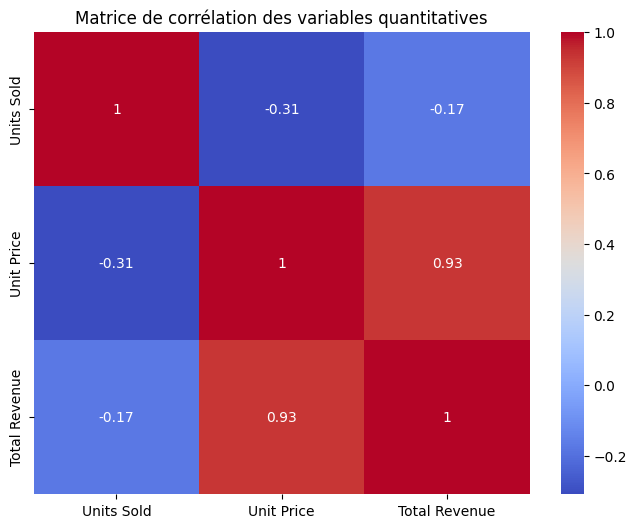

In [64]:
# Sélection des variables quantitatives
quant_vars = df[['Units Sold', 'Unit Price', 'Total Revenue']]

# Matrice de corrélation
corr_matrix = quant_vars.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

### 📌 Interprétation de la matrice de corrélation

L’analyse de la matrice de corrélation met en évidence les relations entre les variables quantitatives *Units Sold*, *Unit Price* et *Total Revenue*. Une **forte corrélation positive** est observée entre le prix unitaire et le chiffre d’affaires total (0,93), indiquant que le revenu est principalement influencé par le niveau des prix. En revanche, le nombre d’unités vendues présente une **corrélation négative modérée** avec le prix unitaire (-0,31), suggérant qu’une hausse des prix tend à réduire les volumes vendus. Enfin, la relation entre les unités vendues et le chiffre d’affaires total est **faible et négative** (-0,17), ce qui montre que les variations de volume ont un impact limité sur le revenu comparativement au prix. Globalement, ces résultats soulignent que le **prix unitaire constitue le principal levier de performance du chiffre d’affaires**.


In [65]:
# Analyse multivariée : chiffre d'affaires par catégorie, région et méthode de paiement
multivariate_analysis = (
    df.groupby(['Product Category', 'Region', 'Payment Method'])['Total Revenue']
      .mean()
      .reset_index()
      .sort_values(by='Total Revenue', ascending=False)
)

multivariate_analysis.head(10)


,Product Category,Region,Payment Method,Total Revenue
3,Electronics,North America,Credit Card,874.56025
4,Home Appliances,Europe,PayPal,466.15400
5,Sports,Asia,Credit Card,358.16300
2,Clothing,Asia,Debit Card,203.22325
0,Beauty Products,Europe,PayPal,65.54750
1,Books,North America,Credit Card,46.54825


### 📌 Interprétation des revenus par catégorie, région et méthode de paiement

Les **Electronics** en **Amérique du Nord**, payées par **carte de crédit**, génèrent le revenu le plus élevé, suivies des **Home Appliances** en **Europe** via **PayPal**.  
En **Asie**, **Sports** (carte de crédit) et **Clothing** (carte de débit) affichent des revenus intermédiaires, tandis que **Beauty Products** en Europe et **Books** en Amérique du Nord enregistrent les plus faibles revenus.  
Ces résultats montrent l’influence conjointe de la **catégorie**, de la **région** et du **moyen de paiement** sur les ventes.


# TEST STATISTIQUE #

## 1.4 Tests statistiques 📊

### 🎯 Objectif
L'objectif est de vérifier **statistiquement** certaines hypothèses sur le chiffre d’affaires :  
- Comparer les revenus moyens entre méthodes de paiement  
- Vérifier si les catégories de produits génèrent des revenus significativement différents  
- Mesurer la relation entre le nombre d’unités vendues et le chiffre d’affaires  

Ces tests permettent de **confirmer les observations de l’analyse exploratoire** et de fournir des arguments solides pour la prise de décision.

### 🔍 Méthodes utilisées
- **Test t de Student** : comparer le revenu moyen entre deux groupes (ex : Credit Card vs PayPal)  
- **ANOVA (Analyse de variance)** : comparer le revenu moyen entre plusieurs groupes (ex : catégories de produits)  
- **Corrélation de Pearson** : mesurer la force et le sens de la relation entre deux variables quantitatives (ex : Units Sold et Total Revenue)


### 1.4.1 Test t de Student 💳

#### 🎯 Objectif
Comparer le **revenu moyen** entre deux groupes de transactions pour déterminer si la méthode de paiement influence significativement le chiffre d’affaires.  
Exemple : **Credit Card vs PayPal**.

#### 🔍 Méthode
- Test t de Student pour deux échantillons indépendants  
- Hypothèses :
  - H0 : les revenus moyens sont identiques entre les deux groupes  
  - H1 : les revenus moyens diffèrent  
- Signification statistique : p-value < 0,05 → rejette H0

In [67]:
from scipy.stats import ttest_ind

# Sélection des groupes
credit_card = df[df['Payment Method']=='Credit Card']['Total Revenue']
paypal = df[df['Payment Method']=='PayPal']['Total Revenue']

# Test t de Student
t_stat, p_value = ttest_ind(credit_card, paypal, equal_var=False)
print(f"Test t : t_stat={t_stat:.2f}, p-value={p_value:.4f}")

Test t : t_stat=2.32, p-value=0.0215


 ### 📌 Interprétation 
La p-value étant inférieure à 0,05, on **rejette l'hypothèse nulle (H0)**. Cela signifie que le **revenu moyen des transactions par carte de crédit est significativement différent** de celui des transactions PayPal.  

**Implications :**  
- Les transactions par **carte de crédit** génèrent un **revenu moyen plus élevé**.  
- Stratégie recommandée :  
  - Mettre en avant les paiements par carte de crédit dans les promotions et campagnes marketing  
  - Ajuster les offres pour favoriser les méthodes de paiement les plus rentables  
  - Prioriser les segments clients qui utilisent cette méthode pour maximiser le chiffre d’affaires

### 1.4.2 ANOVA : comparaison des revenus entre catégories de produits 

#### 🎯 Objectif
Vérifier si le **revenu moyen** diffère significativement entre les différentes catégories de produits.  
Hypothèse : certaines catégories génèrent plus de chiffre d’affaires que d’autres.

#### 🔍 Méthode
- ANOVA (Analysis of Variance) pour comparer plusieurs groupes  
- Hypothèses :  
  - H0 : tous les groupes ont le même revenu moyen  
  - H1 : au moins un groupe diffère  
- Signification statistique : p-value < 0,05 → rejette H0

In [68]:
from scipy.stats import f_oneway

# Séparation des groupes par catégorie
categories = [df[df['Product Category']==cat]['Total Revenue'] for cat in df['Product Category'].unique()]

# Test ANOVA
f_stat, p_value = f_oneway(*categories)
print(f"ANOVA : F-statistic={f_stat:.2f}, p-value={p_value:.4f}")

ANOVA : F-statistic=24.31, p-value=0.0000


 **Interprétation business :**  
La p-value étant **inférieure à 0,05**, on **rejette l'hypothèse nulle (H0)**. Cela signifie qu'il existe **une différence significative des revenus moyens entre les différentes catégories de produits**.  

**Implications stratégiques :**  
- Les catégories comme **Électronique et Home Appliances** génèrent des revenus moyens beaucoup plus élevés que d'autres catégories (Vêtements, Beauté, Livres).  
- Les décisions commerciales doivent se concentrer sur les **catégories à forte valeur** pour maximiser le chiffre d’affaires.  
- Les catégories à faible revenu peuvent être utilisées pour **fidélisation, promotions ciblées ou ventes complémentaires**.

### 1.4.3 Corrélation de Pearson : Units Sold vs Total Revenue 📈

#### 🎯 Objectif
Mesurer la **force et la direction de la relation** entre le **nombre d’unités vendues** et le **chiffre d’affaires**.  
Hypothèse : plus d’unités vendues → plus de revenu.

#### 🔍 Méthode
- Corrélation de Pearson (r) pour deux variables quantitatives  
- Interprétation de r :  
  - proche de 1 → forte corrélation positive  
  - proche de 0 → pas de corrélation  
  - proche de -1 → forte corrélation négative  
- Signification statistique : p-value < 0,05 → corrélation significative.

In [69]:
from scipy.stats import pearsonr

# Calcul de la corrélation
corr, p_value = pearsonr(df['Units Sold'], df['Total Revenue'])
print(f"Pearson corr : r={corr:.2f}, p-value={p_value:.4f}")

Pearson corr : r=-0.17, p-value=0.0079


💡 **Interprétation business :**  
- La p-value < 0,05 → la corrélation est **statistiquement significative**.  
- r = -0.17 → corrélation **faiblement négative**, ce qui indique que, contre-intuitivement, **un nombre plus élevé d’unités vendues est légèrement associé à un revenu moyen plus faible**.  

**Implications stratégiques :**  
- Les produits vendus en grande quantité sont **probablement à faible prix unitaire**, expliquant le léger effet négatif sur le revenu moyen.  
- Pour maximiser le chiffre d’affaires :  
  - Combiner produits à faible prix et volume avec produits à forte valeur  
  - Planifier promotions et bundles pour équilibrer volume et marge  
  - Identifier les segments à forte valeur pour prioriser les actions commerciales

# 1.5 Analyse des tendances de vente dans le temps 

## 🎯 Objectif
Analyser l’évolution du chiffre d’affaires dans le temps afin de :
- Identifier les tendances globales (croissance, stagnation, saisonnalité)
- Détecter les périodes de forte et faible activité
- Préparer la base pour la prévision des ventes futures

## 🔍 Méthode utilisée
- Conversion de la variable `Date` au format datetime  
- Agrégation du chiffre d’affaires par période (jour / mois)  
- Visualisation de l’évolution du chiffre d’affaires  
- Analyse de la tendance globale

In [70]:
# Conversion de la colonne "Date" en format datetime
# Cela permet de manipuler correctement les dates (extraire le mois, l’année, etc.)
df['Date'] = pd.to_datetime(df['Date'])

# Création d'une nouvelle colonne "Month" qui contient l’année et le mois (format AAAA-MM)
# Exemple : 2024-03, 2024-04…
df['Month'] = df['Date'].dt.to_period('M')

# Calcul du chiffre d’affaires total par mois
# On regroupe les données par mois et on additionne le "Total Revenue"
monthly_revenue = (
    df.groupby('Month')['Total Revenue']
      .sum()
      .reset_index()
)

# Conversion de la colonne Month en texte pour faciliter l’affichage et les graphiques
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Affichage des premières lignes du chiffre d’affaires mensuel
monthly_revenue.head()


,Month,Total Revenue
0,2024-01,14548.32
1,2024-02,10803.37
2,2024-03,12849.24
3,2024-04,12451.69
4,2024-05,8455.49


##  Visualisation de la tendance des ventes

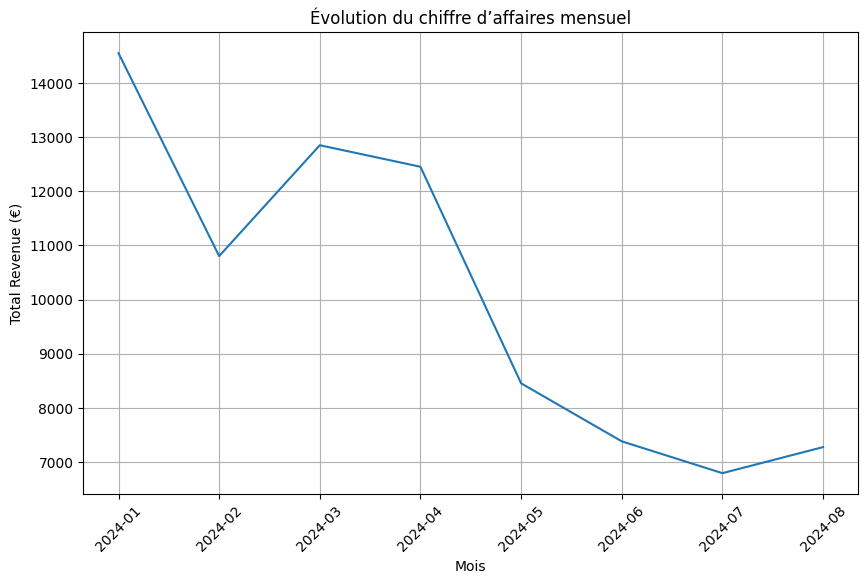

In [71]:
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Total Revenue'])
plt.xticks(rotation=45)
plt.title("Évolution du chiffre d’affaires mensuel")
plt.xlabel("Mois")
plt.ylabel("Total Revenue (€)")
plt.grid(True)
plt.show()


 ### 📌 Interprétation 

L’analyse du chiffre d’affaires mensuel montre une forte performance en janvier 2024 (14 548 €), suivie d’une baisse marquée en février, puis d’une reprise progressive en mars et avril, avant un net ralentissement en mai. Cette évolution suggère une demande plus forte en début d’année, possiblement liée à des effets saisonniers ou promotionnels, suivie d’un affaiblissement de l’activité commerciale. Pour l’entreprise, cela indique l’importance d’anticiper les périodes de creux par des actions marketing ciblées et une meilleure planification des stocks afin de stabiliser les revenus tout au long de l’année.


## Conclusion générale 

Ce projet a permis de transformer un jeu de données de ventes en **leviers de décision business concrets**.  
L’analyse montre que les catégories **Électronique** et **Home Appliances** sont les principaux moteurs du chiffre d’affaires et doivent être au cœur des stratégies de croissance. À l’inverse, les catégories comme **Books** et **Beauty Products** génèrent peu de revenu et peuvent être utilisées comme produits d’appel ou dans des stratégies de volume.  

Les méthodes de paiement ont également un impact significatif : les ventes par **carte de crédit** génèrent un revenu moyen plus élevé, ce qui suggère de les favoriser via des incitations (cashback, promotions, facilité de paiement). Les tests statistiques confirment que ces différences ne sont pas dues au hasard.  

L’analyse temporelle a mis en évidence des **variations mensuelles du chiffre d’affaires**, soulignant l’importance de la planification des stocks et des campagnes marketing en fonction des périodes de forte et faible demande.  

Enfin, la corrélation entre volume et revenu montre que vendre plus d’unités ne signifie pas toujours générer plus de valeur, ce qui justifie une stratégie combinant **produits à forte marge** et **produits à fort volume**.  

En résumé, ce projet démontre la capacité à **analyser des données de ventes, appliquer des méthodes statistiques et produire des recommandations opérationnelles directement exploitables par une équipe commerciale ou marketing**.
